# Cleaning

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("0_9999.csv")

In [194]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

count = 0
for i,name in enumerate(df.name):
    ls_names = name.split(" ")
    if len(ls_names)>1:
        count+=1
count/len(df.name)

0.02701604712573634

Only 2% have last name information

In [195]:
ls = []
# df.drop_duplicates(inplace=True)
# df.reset_index(inplace=True, drop=True)
index = [219,5117,9487]
for i,name in enumerate(df.name):
    ls_names = name.split(" ")
    if len(ls_names)>1:
        if '(' in name.lower():
            ls.append((name, i))
        if "&" in name.lower() or "and" in name.lower() or "et" in name.lower() or "+" in name.lower():
            index.append(i)
        elif i == 7822:
            df.name.iloc[i] = ls_names[-1]
        else:
            df.name.iloc[i] = ls_names[0]
    elif i == 515 or i == 661 or i == 8094:
        df.name.iloc[i] = name.split("(")[-1][:-1]
    elif i == 9523:
        df.name.iloc[i] = name.split("(")[0]
index.sort()
df.drop(index=index, inplace=True)
df.reset_index(inplace=True, drop=True)

C:\Users\vicda\AppData\Local\Temp\ipykernel_31996\2812749018.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name.iloc[i] = ls_names[0]
C:\Users\vicda\AppData\Local\Temp\ipykernel_31996\2812749018.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name.iloc[i] = name.split("(")[-1][:-1]
C:\Users\vicda\AppData\Local\Temp\ipykernel_31996\2812749018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name.iloc[i] = ls_nam

In [196]:
df.name.iloc[6687] = df.name.iloc[6687].split("/")[0]

C:\Users\vicda\AppData\Local\Temp\ipykernel_31996\3793345740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name.iloc[6687] = df.name.iloc[6687].split("/")[0]


In [197]:
names = df.name
urls = df.image
ids = df.guest_id

# Retrieve images

In [198]:
import requests
import shutil 
import os
import pandas as pd

In [65]:
folder = "images/"
if not os.path.exists(folder):
    os.makedirs(folder)

fails = []
for i in range(6687,urls.size):
    response = requests.get(urls[i], stream=True)

    if response.status_code == 200:
        filename = folder + names[i] + "_" + str(ids[i]) + "." + urls[i].split('.')[-1]
        with open(filename,'wb') as f:
            shutil.copyfileobj(response.raw, f)
    
    else:
        fails.append(i)
        print(f'Image {i} Couldn\'t be retrieved')

Image 6915 Couldn't be retrieved
Image 7793 Couldn't be retrieved
Image 8201 Couldn't be retrieved
Image 8657 Couldn't be retrieved
Image 8711 Couldn't be retrieved
Image 8901 Couldn't be retrieved
Image 9016 Couldn't be retrieved
Image 9417 Couldn't be retrieved


In [199]:
len(fails)

34

In [204]:
df.drop(index=fails, inplace=True)
df.reset_index(inplace=True, drop=True)
names = df.name
urls = df.image
ids = df.guest_id

In [226]:
from pathlib import Path

import os
import face_recognition
import pickle
from PIL import Image, ImageDraw

DEFAULT_ENCODINGS_PATH = Path("output/encodings.pkl")

Path("training").mkdir(exist_ok=True)
Path("output").mkdir(exist_ok=True)
Path("validation").mkdir(exist_ok=True)

In [3]:
def encode_known_faces( 
    model: str = "hog", 
    images_location: str = "images",
    encodings_location: Path = DEFAULT_ENCODINGS_PATH
):

    names = []
    encodings = []
    bboxes = []

    multi_faces = []
    print("started")
    for filepath in os.listdir(images_location):
        name = filepath
        image = face_recognition.load_image_file(images_location + "/" + filepath)
        face_locations = face_recognition.face_locations(image, model=model)
        face_encodings = face_recognition.face_encodings(image, face_locations)
        if len(face_locations)>1:
            multi_faces.append(filepath)

        for location, encoding in zip(face_locations, face_encodings):
            names.append(name)
            encodings.append(encoding)
            bboxes.append(location)

    name_encodings = {"names": names, "encodings": encodings, "bbox": bboxes}
    with encodings_location.open(mode="wb") as f:
        pickle.dump(name_encodings, f)
    return multi_faces

In [4]:
m_faces = encode_known_faces()

started


In [5]:
len(m_faces)

1523

In [6]:
encodings_location: Path = DEFAULT_ENCODINGS_PATH
with encodings_location.open(mode="rb") as f:
    loaded_encodings = pickle.load(f)

In [7]:
loaded_encodings

{'names': ['-SüKii..!_274758899.jpg',
  'A&K_253297215.jpg',
  'Aaron_14912120.jpg',
  'Aaron_149476337.jpg',
  'Aaron_216599520.jpg',
  'Aaron_227062949.jpg',
  'Aaron_30612945.jpg',
  'Aaron_32879951.jpg',
  'Aaron_58417518.jpg',
  'Aaron_58417518.jpg',
  'Aaron_60247511.jpg',
  'Aaron_8202067.jpg',
  'Aaron_8202067.jpg',
  'Aaron_9819683.jpg',
  'Abbe_100367224.jpg',
  'Abbie_2038367.jpg',
  'Abbie_237822.jpg',
  'Abby_21110375.jpg',
  'Abby_21110375.jpg',
  'Abby_282600509.jpg',
  'Abby_4243324.jpg',
  'Abby_59329298.jpg',
  'Abdalla_131835924.jpg',
  'Abdalla_131835924.jpg',
  'Abdullah_101826267.jpg',
  'Abdullah_187984126.jpg',
  'Abdullah_214381751.jpg',
  'Abdullah_28845899.jpg',
  'Abdullah_28845899.jpg',
  'Abdulla_173780986.jpg',
  'Abdulmajeed_41912516.jpg',
  'Abdul_107716145.jpg',
  'Abel_140513445.jpg',
  'Abhimitra_178245581.jpg',
  'Abhinandan_81013526.jpg',
  'Abhinandan_81013526.jpg',
  'Abigail_137566626.jpg',
  'Abigail_4234138.jpg',
  'Abigail_7526337.jpg',
  'Ab

In [229]:
BOUNDING_BOX_COLOR = "blue"
TEXT_COLOR = "white"
def _display_face(draw, bounding_box, name):
    top, right, bottom, left = bounding_box
    draw.rectangle(((left, top), (right, bottom)), outline=BOUNDING_BOX_COLOR)
    text_left, text_top, text_right, text_bottom = draw.textbbox(
        (left, bottom), name
    )
    draw.rectangle(
        ((text_left, text_top), (text_right, text_bottom)),
        fill="blue",
        outline="blue",
    )
    draw.text(
        (text_left, text_top),
        name,
        fill="white",
    )

In [7]:
names = loaded_encodings["names"]
face_locations = loaded_encodings["bbox"]
# Removed print(name, bounding_box)
for filename, bbox in zip(names, face_locations):
    input_image = face_recognition.load_image_file("training/"+filename)
    pillow_image = Image.fromarray(input_image)
    draw = ImageDraw.Draw(pillow_image)
    name = filename.split('_')
    _display_face(draw, bbox, name)
    del draw
    pillow_image.show()


In [55]:
for filepath in os.listdir("training"):
    print(filepath)

(Email hidden by Airbnb)_85736450.jpg
-SüKii..!_274758899.jpg
A&K_253297215.jpg
Aaron_1541470.jpg
Aaron_4609795.jpg
Aaron_9819683.jpg
A_189610926.jpg


# Gender

In [178]:
from genderize import Genderize

In [179]:
dictNames = dict()
for i,name in enumerate(names):
    try:
        dictNames[name].append(i)
    except:
        dictNames[name] = [i]

In [180]:
len(names)

9699

In [181]:
listNames = list(dictNames.keys())

In [182]:
len(listNames)

3659

In [141]:
genders = ['']*len(names)

# df1 = pd.read_csv("Airbnb.csv")
# genders = df1.genders.copy()

In [ ]:
prev = 0
for i in range(0,len(names),5):
    namesInput = listNames[prev:i]
    try:
        gendersOutput = Genderize().get(namesInput)
    except:
        print("Stop ", prev)
        break
    for name, gender in zip(namesInput, gendersOutput):
        for ind in dictNames[name]:
            genders[ind] = gender
    print(prev)
    prev = i

In [158]:
for i in range(len(listNames)):
    if pd.isna(genders[dictNames[listNames[i]][0]]):
        print("Next prev = ",i)
        print("Last entry: ", i-1,genders[dictNames[listNames[i-1]][0]])
        break

In [202]:
df["genderize"] = genders
# df1["genders"] = genders
# df1.to_csv("Airbnb.csv",index=False)

In [191]:
genders

0       {'count': 204, 'gender': 'male', 'name': 'Harj...
1       {'count': 7383, 'gender': 'female', 'name': 'T...
2       {'count': 2274744, 'gender': 'male', 'name': '...
3       {'count': 766466, 'gender': 'male', 'name': 'A...
4       {'count': 571165, 'gender': 'female', 'name': ...
                              ...                        
9728    {'count': 1154, 'gender': 'male', 'name': 'Maj...
9729    {'count': 65364, 'gender': 'female', 'name': '...
9730    {'count': 156028, 'gender': 'female', 'name': ...
9731    {'count': 93411, 'gender': 'female', 'name': '...
9732    {'count': 28200, 'gender': 'female', 'name': '...
Name: genders, Length: 9733, dtype: object

In [24]:
df1 = pd.read_csv("Airbnb.csv")
df1.genderize

0       {'count': 204, 'gender': 'male', 'name': 'Harj...
1       {'count': 7383, 'gender': 'female', 'name': 'T...
2       {'count': 2274744, 'gender': 'male', 'name': '...
3       {'count': 766466, 'gender': 'male', 'name': 'A...
4       {'count': 571165, 'gender': 'female', 'name': ...
                              ...                        
9694    {'count': 1154, 'gender': 'male', 'name': 'Maj...
9695    {'count': 65364, 'gender': 'female', 'name': '...
9696    {'count': 156028, 'gender': 'female', 'name': ...
9697    {'count': 93411, 'gender': 'female', 'name': '...
9698    {'count': 28200, 'gender': 'female', 'name': '...
Name: genderize, Length: 9699, dtype: object

In [195]:
df1.genderize = df1.genderize.str.replace("'",'"')

In [196]:
import json

pred_gender = []
for pred in df1.genderize:
    try:
        pred_gender.append(json.loads(pred)['gender'])
    except:
        pred_gender.append("undefined")

In [197]:
pd.value_counts(pred_gender)

female       4971
male         4420
undefined     107
dtype: int64

In [215]:
dg = dict()
dg["male"] = 0
dg["female"] = 1
dg["undefined"] = -1
genderize_pred = [dg[gender] for gender in pred_gender]

In [216]:
df1["genderize_pred"] = genderize_pred

# Gender - Images

In [172]:
df1 = df1.drop(columns =["reviews","profile","listing_id","address","review_date", "language","job"],axis=1)
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

In [61]:
import cv2
from pathlib import Path
import pickle
import numpy as np


In [33]:
GENDER_MODEL = "opencv/deploy_gender.prototxt"
GENDER_WEIGHTS = "opencv/gender_net.caffemodel"
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

gender_net = cv2.dnn.readNetFromCaffe(GENDER_MODEL, GENDER_WEIGHTS)

In [10]:
DEFAULT_ENCODINGS_PATH = Path("output/encodings.pkl")
encodings_location: Path = DEFAULT_ENCODINGS_PATH
with encodings_location.open(mode="rb") as f:
    loaded_encodings = pickle.load(f)

In [3]:
def display_img(title, img):
    """Displays an image on screen and maintains the output until the user presses a key"""
    # Display Image on screen
    cv2.imshow(title, img)
    # Mantain output until user presses a key
    cv2.waitKey(0)
    # Destroy windows when user presses a key
    cv2.destroyAllWindows()

In [25]:
def label_gender(loaded_encodings, pathFolder = ""):
    filenames = loaded_encodings["names"]
    bboxes = loaded_encodings["bbox"]
    genders = []

    for filename, bbox in zip(filenames, bboxes):
        try:
            img = cv2.imread(pathFolder+filename)
            top, right, bottom, left = bbox
            face = img[top:bottom,left:right]
            cv2.imshow("A",face)
            key = cv2.waitKey(0)
            cv2.destroyAllWindows()
            if key == 48:
                genders.append(0)
            elif key == 49:
                genders.append(1)
        except:
            genders.append(-1)
            
    return genders

In [26]:
label_gender(loaded_encodings, "training/")

[1, -1, 1, 0, 1]

In [34]:
def predict_gender(loaded_encodings, pathFolder = "", m_faces=[]):
    filenames = loaded_encodings["names"]
    bboxes = loaded_encodings["bbox"]
    out = []
    last = ""
    for filename, bbox in zip(filenames, bboxes):
        if filename in m_faces:
            if filename == last:
                continue
            out.append((-2,[0,0]))
            last = filename
        else:
            try:
                img = cv2.imread(pathFolder+filename)
                top, right, bottom, left = bbox
                face = img[top:bottom,left:right]
                blob = cv2.dnn.blobFromImage(image=face, scalefactor=1.0, size=(
                    227, 227), mean=MODEL_MEAN_VALUES, swapRB=False, crop=False)
                gender_net.setInput(blob)
                gender_preds = gender_net.forward()
                gender = 0 if gender_preds[0][0]>gender_preds[0][1] else 1
                out.append((gender,gender_preds[0]))
            except:
                out.append((-1,[0,0]))
    
    return out

In [30]:
m_faces = list(pd.value_counts(loaded_encodings["names"])[pd.value_counts(loaded_encodings["names"])>1].index)
pred_gen_img = predict_gender(loaded_encodings, "images/", m_faces=m_faces)
pd.value_counts([p[0] for p in pred_gen_img])

In [35]:
pred_gen_img = predict_gender(loaded_encodings, "images/", m_faces=m_faces)

In [36]:
pd.value_counts([p[0] for p in pred_gen_img])

 0    3042
 1    2955
-2    1523
-1      76
dtype: int64

In [173]:
df1["opencv"] = list(["[0.0 0.0]"]*len(df1.name))
df1["opencv_pred"] = [""]*len(df1.name)
img_pred_names = pd.unique(loaded_encodings["names"])
for filename, pred_ in zip(img_pred_names, pred_gen_img):
    n, id= filename[:-4].split('_')
    df1.opencv.iloc[df1[df1.guest_id==int(id)].index] = str(pred_[1])
    df1.opencv_pred.iloc[df1[df1.guest_id==int(id)].index] = pred_[0]


C:\Users\vicda\AppData\Local\Temp\ipykernel_30592\490245938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.opencv.iloc[df1[df1.guest_id==int(id)].index] = str(pred_[1])
C:\Users\vicda\AppData\Local\Temp\ipykernel_30592\490245938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.opencv_pred.iloc[df1[df1.guest_id==int(id)].index] = pred_[0]


In [175]:
df1.opencv_pred.value_counts()

0     3042
1     2955
      1902
-2    1523
-1      76
Name: opencv_pred, dtype: int64

In [177]:
n = df1.opencv_pred.value_counts()[""]
print("Number of samples in which one face was not identified:", n)

Number of samples in which one face was not identified: 1902


In [446]:
c = 0
k = 0
fls2=[]
names = []
encodings = []
bboxes = []
multi_faces = []
DEFAULT_ENCODINGS_PATH1 = Path("output/encodings2.pkl")
encodings_location: Path = DEFAULT_ENCODINGS_PATH1

for filepath in fls1:
    try:
        image = face_recognition.load_image_file("images/" + filepath)
        face_locations = face_recognition.face_locations(image,3,  model="hog")
        face_encodings = face_recognition.face_encodings(image,face_locations)
        if len(face_locations)>0:
            k+=1
            if len(face_locations)>1:
                multi_faces.append(filepath)
            
            for location, encoding in zip(face_locations, face_encodings):
                names.append(filepath)
                encodings.append(encoding)
                bboxes.append(location)
        else:
            c+=1
            fls2.append(filepath)
    except:
        c+=1
        fls2.append(filepath)

name_encodings = {"names": names, "encodings": encodings, "bbox": bboxes}
with encodings_location.open(mode="wb") as f:
    pickle.dump(name_encodings, f)

print("Number of images in which one face was not identified:", c)
        

Number of images in which one face was not identified: 1332


In [444]:
len(fls), len(fls1),len(fls)-len(fls1),len(fls)-len(fls1)-len(multi_faces), c, len(multi_faces)

(1902, 1506, 396, 302, 1506, 94)

In [448]:
len(fls2)

1332

In [178]:
e_l1: Path = Path("output/encodings1.pkl")
e_l2: Path = Path("output/encodings2.pkl")
with e_l1.open(mode="rb") as f:
    l_e1 = pickle.load(f)
with e_l2.open(mode="rb") as f:
    l_e2 = pickle.load(f)

In [184]:
m_faces = list(pd.value_counts(l_e1["names"])[pd.value_counts(l_e1["names"])>1].index)
pred_1 = predict_gender(l_e1, "images/", m_faces)
pd.value_counts([p[0] for p in pred_1])

 1    183
 0    116
-2     94
-1      3
dtype: int64

In [185]:
img_1 = pd.unique(l_e1["names"])
for filename, pred_ in zip(img_1, pred_1):
    n, id= filename[:-4].split('_')
    df1.opencv.iloc[df1[df1.guest_id==int(id)].index] = str(pred_[1])
    df1.opencv_pred.iloc[df1[df1.guest_id==int(id)].index] = pred_[0]

C:\Users\vicda\AppData\Local\Temp\ipykernel_30592\991170792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.opencv.iloc[df1[df1.guest_id==int(id)].index] = str(pred_[1])
C:\Users\vicda\AppData\Local\Temp\ipykernel_30592\991170792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.opencv_pred.iloc[df1[df1.guest_id==int(id)].index] = pred_[0]


In [186]:
df1.opencv_pred.value_counts()

0     3158
1     3138
-2    1617
      1506
-1      79
Name: opencv_pred, dtype: int64

In [190]:
m_faces = list(pd.value_counts(l_e2["names"])[pd.value_counts(l_e2["names"])>1].index)
pred_2 = predict_gender(l_e2, "images/", m_faces)
pd.value_counts([p[0] for p in pred_2])

 1    108
 0     46
-2     19
-1      1
dtype: int64

In [192]:
img_2 = pd.unique(l_e2["names"])
for filename, pred_ in zip(img_2, pred_2):
    n, id= filename[:-4].split('_')
    df1.opencv.iloc[df1[df1.guest_id==int(id)].index] = str(pred_[1])
    df1.opencv_pred.iloc[df1[df1.guest_id==int(id)].index] = pred_[0]

C:\Users\vicda\AppData\Local\Temp\ipykernel_30592\688274412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.opencv.iloc[df1[df1.guest_id==int(id)].index] = str(pred_[1])
C:\Users\vicda\AppData\Local\Temp\ipykernel_30592\688274412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.opencv_pred.iloc[df1[df1.guest_id==int(id)].index] = pred_[0]


In [193]:
df1.opencv_pred.value_counts()

1     3246
0     3204
-2    1636
      1332
-1      80
Name: opencv_pred, dtype: int64

In [222]:
df1.head()

,guest_id,name,image,genderize,opencv,opencv_pred,genderize_pred
0,93292025,Harjinder,https://a0.muscache.com/im/pictures/user/5f09d...,"{""count"": 204, ""gender"": ""male"", ""name"": ""Harj...",[0.0 0.0],,0
1,183639942,Taylor,https://a0.muscache.com/im/pictures/user/98383...,"{""count"": 7383, ""gender"": ""female"", ""name"": ""T...",[0.01541387 0.9845861 ],1,1
2,37846734,John,https://a0.muscache.com/im/pictures/user/054a0...,"{""count"": 2274744, ""gender"": ""male"", ""name"": ""...",[0.04354855 0.9564514 ],1,0
3,48408491,Andrew,https://a0.muscache.com/im/pictures/user/3f125...,"{""count"": 766466, ""gender"": ""male"", ""name"": ""A...",[1.0000000e+00 1.8268205e-08],0,0
4,51146446,Stephanie,https://a0.muscache.com/im/pictures/user/c7457...,"{""count"": 571165, ""gender"": ""female"", ""name"": ...",[0.94214517 0.05785489],0,1


In [223]:
'John_37846734.jpg'

'https://a0.muscache.com/im/pictures/user/054a05eb-756c-485f-85cf-65ca5ffc9916.jpg'

In [237]:
image = face_recognition.load_image_file("images/John_37846734.jpg")
face_locations = face_recognition.face_locations(image, model='hog')
face_encodings = face_recognition.face_encodings(image, face_locations)

input_image = face_recognition.load_image_file("images/John_37846734.jpg")
pillow_image = Image.fromarray(input_image)
draw = ImageDraw.Draw(pillow_image)
name = filename.split('_')
_display_face(draw, face_locations[0], name)
del draw
pillow_image.show()

img = cv2.imread("images/John_37846734.jpg")
top, right, bottom, left = face_locations[0]
face = img[top:bottom,left:right]
blob = cv2.dnn.blobFromImage(image=face, scalefactor=1.0, size=(
    227, 227), mean=MODEL_MEAN_VALUES, swapRB=False, crop=False)
gender_net.setInput(blob)
gender_net.forward()

array([[0.04354855, 0.9564514 ]], dtype=float32)

In [238]:
df1.to_csv("Airbnb_gender.csv",index=False)

In [239]:
df1.head()

,guest_id,name,image,genderize,opencv,opencv_pred,genderize_pred
0,93292025,Harjinder,https://a0.muscache.com/im/pictures/user/5f09d...,"{""count"": 204, ""gender"": ""male"", ""name"": ""Harj...",[0.0 0.0],,0
1,183639942,Taylor,https://a0.muscache.com/im/pictures/user/98383...,"{""count"": 7383, ""gender"": ""female"", ""name"": ""T...",[0.01541387 0.9845861 ],1,1
2,37846734,John,https://a0.muscache.com/im/pictures/user/054a0...,"{""count"": 2274744, ""gender"": ""male"", ""name"": ""...",[0.04354855 0.9564514 ],1,0
3,48408491,Andrew,https://a0.muscache.com/im/pictures/user/3f125...,"{""count"": 766466, ""gender"": ""male"", ""name"": ""A...",[1.0000000e+00 1.8268205e-08],0,0
4,51146446,Stephanie,https://a0.muscache.com/im/pictures/user/c7457...,"{""count"": 571165, ""gender"": ""female"", ""name"": ...",[0.94214517 0.05785489],0,1


In [241]:
df1.opencv_pred.value_counts()

1     3246
0     3204
-2    1636
      1332
-1      80
Name: opencv_pred, dtype: int64

: 

In [ ]:
df1.head()

In [425]:
image = face_recognition.load_image_file("images/" + fls[3])
face_locations = face_recognition.face_locations(image,1, model="hog")
# face_encodings = face_recognition.face_encodings(image, face_locations)
len(face_locations), len(face_encodings)

(0, 0)

In [73]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
import cv2


In [4]:
df1 = pd.read_csv("Airbnb_gender.csv")

In [6]:
df1[["opencv_pred","genderize_pred"]].value_counts()

opencv_pred  genderize_pred
 1.0          1                2526
 0.0          0                2345
-2.0          1                 858
 0.0          1                 825
-2.0          0                 767
 1.0          0                 682
-1.0          1                  47
 1.0         -1                  38
 0.0         -1                  34
-1.0          0                  27
-2.0         -1                  11
-1.0         -1                   6
dtype: int64

In [24]:
e_l0: Path = Path("output/encodings.pkl")
e_l1: Path = Path("output/encodings1.pkl")
e_l2: Path = Path("output/encodings2.pkl")
with e_l0.open(mode="rb") as f:
    l_e0 = pickle.load(f)
with e_l1.open(mode="rb") as f:
    l_e1 = pickle.load(f)
with e_l2.open(mode="rb") as f:
    l_e2 = pickle.load(f)

In [27]:
def label_gender(loaded_encodings, df, pathFolder = "", n = 0):
    filenames = loaded_encodings["names"]
    bboxes = loaded_encodings["bbox"]
    genders = dict()
    i = 0
    prev = "0"
    for filename, bbox in zip(filenames, bboxes):
        i+=1
        if n>i:
            continue
        id = int(filename[:-4].split('_')[1])
        if id in df.guest_id.values:
            if df[df.guest_id==id].opencv_pred.values[0]>=0 and df[df.guest_id==id].genderize_pred.values[0]>=0:
                clear_output(False)
                print("Here, previous: ", prev, " Current:")
                print(filename,df[df.guest_id==id].genderize_pred)
                prev = str(id)
                try:
                    img = cv2.imread(pathFolder+filename)
                    print(pathFolder+filename)
                    top, right, bottom, left = bbox
                    face = img[top:bottom,left:right]
                    dim = (300, 300)
                    resized = cv2.resize(face, dim, interpolation = cv2.INTER_AREA)
                    cv2.imshow(filename,resized)
                    key = cv2.waitKey(0)
                    cv2.destroyAllWindows()
                    if key == 48:
                        genders[id] = 0
                    elif key == 49:
                        genders[id] = 1
                    elif key == 50: # Alt
                        cv2.imshow(filename,img)
                        key = cv2.waitKey(0)
                        cv2.destroyAllWindows()
                        if key == 48:
                            genders[id] = 0
                        elif key == 49:
                            genders[id] = 1
                        elif key == 50: # 2
                            dim = (100, 100)
                            resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
                            cv2.imshow(filename,resized_img)
                            key = cv2.waitKey(0)
                            cv2.destroyAllWindows()
                            if key == 48:
                                genders[id] = 0
                            elif key == 49:
                                genders[id] = 1
                            elif key == 52:
                                genders[id] = -1
                            elif key == 27:
                                break
                        elif key == 51: # 3
                            dim = (400, 400)
                            resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
                            cv2.imshow(filename,resized_img)
                            key = cv2.waitKey(0)
                            cv2.destroyAllWindows()
                            if key == 48:
                                genders[id] = 0
                            elif key == 49:
                                genders[id] = 1
                            elif key == 52:
                                genders[id] = -1
                            elif key == 27:
                                break
                        elif key == 52:
                            genders[id] = -1
                        elif key == 27:
                            break
                    elif key == 27:
                        break
                except:
                    genders[id] = -1
        
    print(i)
    return genders

In [198]:
label_gender(l_e2, df1, pathFolder = "images/")

Aarti_3643680.jpg 3643680 True 4063    0.0
Name: opencv_pred, dtype: float64 4063    1
Name: genderize_pred, dtype: int64
Here
images/Aarti_3643680.jpg
Abed_146301043.jpg 146301043 True 3652    0.0
Name: opencv_pred, dtype: float64 3652    0
Name: genderize_pred, dtype: int64
Here
images/Abed_146301043.jpg
Adam_274348378.jpg 274348378 True 5770    0.0
Name: opencv_pred, dtype: float64 5770    0
Name: genderize_pred, dtype: int64
Here
images/Adam_274348378.jpg
Aengus_44228098.jpg 44228098 True 8495    0.0
Name: opencv_pred, dtype: float64 8495    0
Name: genderize_pred, dtype: int64
Here
images/Aengus_44228098.jpg
Aimee_16882631.jpg 16882631 True 2257    0.0
Name: opencv_pred, dtype: float64 2257    1
Name: genderize_pred, dtype: int64
Here
images/Aimee_16882631.jpg
Akiko_153793337.jpg 153793337 True 3082    0.0
Name: opencv_pred, dtype: float64 3082    1
Name: genderize_pred, dtype: int64
Here
images/Akiko_153793337.jpg
Alan_33878157.jpg 33878157 True 2384    0.0
Name: opencv_pred, dty

{3643680: 1,
 146301043: 0,
 274348378: 0,
 44228098: 0,
 16882631: 1,
 153793337: 0,
 33878157: 0,
 193362479: 0,
 31668785: 1,
 135563788: 1,
 4173436: 0,
 86269722: 1}

In [131]:
true_genders = label_gender(l_e2, df1, pathFolder = "images/")
df1["true"] = [-3]*len(df1.image)
for k, v in true_genders.items():
    df1.loc[df1.guest_id==k, 'true'] = v

Aarti_3643680.jpg 3643680 True 4063    0.0
Name: opencv_pred, dtype: float64 4063    1
Name: genderize_pred, dtype: int64
Here
images/Aarti_3643680.jpg
Abed_146301043.jpg 146301043 True 3652    0.0
Name: opencv_pred, dtype: float64 3652    0
Name: genderize_pred, dtype: int64
Here
images/Abed_146301043.jpg
Adam_274348378.jpg 274348378 True 5770    0.0
Name: opencv_pred, dtype: float64 5770    0
Name: genderize_pred, dtype: int64
Here
images/Adam_274348378.jpg
Aengus_44228098.jpg 44228098 True 8495    0.0
Name: opencv_pred, dtype: float64 8495    0
Name: genderize_pred, dtype: int64
Here
images/Aengus_44228098.jpg
Aimee_16882631.jpg 16882631 True 2257    0.0
Name: opencv_pred, dtype: float64 2257    1
Name: genderize_pred, dtype: int64
Here
images/Aimee_16882631.jpg
Akiko_153793337.jpg 153793337 True 3082    0.0
Name: opencv_pred, dtype: float64 3082    1
Name: genderize_pred, dtype: int64
Here
images/Akiko_153793337.jpg
Alan_33878157.jpg 33878157 True 2384    0.0
Name: opencv_pred, dty

In [146]:
true_genders1 = label_gender(l_e1, df1, pathFolder = "images/")

Aaron_1541470.jpg 1541470 True 1181    0.0
Name: opencv_pred, dtype: float64 1181    0
Name: genderize_pred, dtype: int64
Here
images/Aaron_1541470.jpg
Abby_162533268.jpg 162533268 True 359    1.0
Name: opencv_pred, dtype: float64 359    1
Name: genderize_pred, dtype: int64
Here
images/Abby_162533268.jpg
Adam_50979480.jpg 50979480 True 2300    1.0
Name: opencv_pred, dtype: float64 2300    0
Name: genderize_pred, dtype: int64
Here
images/Adam_50979480.jpg
Adriana_96731206.jpg 96731206 True 3217   -2.0
Name: opencv_pred, dtype: float64 3217    1
Name: genderize_pred, dtype: int64
Adriana_96731206.jpg 96731206 True 3217   -2.0
Name: opencv_pred, dtype: float64 3217    1
Name: genderize_pred, dtype: int64
Adriana_96731206.jpg 96731206 True 3217   -2.0
Name: opencv_pred, dtype: float64 3217    1
Name: genderize_pred, dtype: int64
Adriana_96731206.jpg 96731206 True 3217   -2.0
Name: opencv_pred, dtype: float64 3217    1
Name: genderize_pred, dtype: int64
Agustina_48016890.jpg 48016890 True 9

In [147]:
for k, v in true_genders1.items():
    df1.loc[df1.guest_id==k, 'true'] = v

In [148]:
df1.to_csv("Airbnb_gender-e2-e1.csv") # version with embedding 2

In [292]:
df2.genderize

0       {"count": 766466, "gender": "male", "name": "A...
1       {"count": 1058881, "gender": "female", "name":...
2       {"count": 101812, "gender": "male", "name": "A...
3       {"count": 55819, "gender": "female", "name": "...
4       {"count": 384414, "gender": "female", "name": ...
                              ...                        
2073    {"count": 389780, "gender": "female", "name": ...
2074    {"count": 2189, "gender": "male", "name": "Chu...
2075    {"count": 11701, "gender": "female", "name": "...
2076    {"count": 18564, "gender": "female", "name": "...
2077    {"count": 487983, "gender": "female", "name": ...
Name: genderize, Length: 2078, dtype: object

In [185]:
df = df1[df1.true>-1].copy()
df.reset_index(inplace=True)
sum(df.true == df.opencv_pred)/len(df.true), sum(df.true == df.genderize_pred)/len(df.true)

(0.648910411622276, 0.9176755447941889)

In [1]:
import pandas as pd

df1 = pd.read_csv('Airbnb_gender-e2-e1.csv')

In [3]:
df1.true.value_counts()

-3    9053
 1     228
 0     185
-1      32
Name: true, dtype: int64

In [12]:
from pathlib import Path
import pickle
import 
from IPython.display import clear_output

In [118]:
e_l0: Path = Path("output/encodings.pkl")
e_l1: Path = Path("output/encodings1.pkl")
e_l2: Path = Path("output/encodings2.pkl")
with e_l0.open(mode="rb") as f:
    l_e0 = pickle.load(f)
with e_l1.open(mode="rb") as f:
    l_e1 = pickle.load(f)
with e_l2.open(mode="rb") as f:
    l_e2 = pickle.load(f)

0 male 

1 female

2 resize small

3 resize big

4 error

esc exit

In [28]:
true_gendersbig = label_gender(l_e0, df1, pathFolder = "images/")

Here, previous:  109018725  Current:
Elmira_168220312.jpg 2490    1
Name: genderize_pred, dtype: int64
images/Elmira_168220312.jpg
2716


In [29]:
len(true_gendersbig)

1696

In [34]:
for k, v in true_gendersbig.items():
    df1.loc[df1.guest_id==k, 'true'] = v

In [45]:
count =0
inds = []
for k, v in true_gendersbig.items():
    if df1[df1.guest_id==k].true.values != df1[df1.guest_id==k].genderize_pred.values and v!=-1:
        print(df1[df1.guest_id==k][["genderize_pred", "opencv_pred", "true"]])
        inds.append(k)
        count +=1

      genderize_pred  opencv_pred  true
5055               0          1.0     1
      genderize_pred  opencv_pred  true
9274               1          0.0     0
      genderize_pred  opencv_pred  true
4232               0          0.0     1
      genderize_pred  opencv_pred  true
5315               0          1.0     1
      genderize_pred  opencv_pred  true
5962               1          0.0     0
     genderize_pred  opencv_pred  true
367               1          0.0     0
      genderize_pred  opencv_pred  true
6237               0          1.0     1
      genderize_pred  opencv_pred  true
6167               0          1.0     1
      genderize_pred  opencv_pred  true
8230               0          1.0     1
     genderize_pred  opencv_pred  true
361               0          0.0     1
      genderize_pred  opencv_pred  true
2117               0          1.0     1
     genderize_pred  opencv_pred  true
707               0          1.0     1
      genderize_pred  opencv_pred  true
1766  

In [46]:
count

131

In [47]:
def label_gender_correct(loaded_encodings, df, inds,  pathFolder = "", n = 0):
    filenames = loaded_encodings["names"]
    bboxes = loaded_encodings["bbox"]
    genders = dict()
    i = 0
    prev = "0"
    for filename, bbox in zip(filenames, bboxes):
        i+=1
        if n>i:
            continue
        id = int(filename[:-4].split('_')[1])
        if id in df.guest_id.values and id in inds:
            if df[df.guest_id==id].opencv_pred.values[0]>=0 and df[df.guest_id==id].genderize_pred.values[0]>=0:
                clear_output(False)
                print("Here, previous: ", prev, " Current:")
                print(filename,df[df.guest_id==id].genderize_pred)
                prev = str(id)
                try:
                    img = cv2.imread(pathFolder+filename)
                    print(pathFolder+filename)
                    top, right, bottom, left = bbox
                    face = img[top:bottom,left:right]
                    dim = (300, 300)
                    resized = cv2.resize(face, dim, interpolation = cv2.INTER_AREA)
                    cv2.imshow(filename,resized)
                    key = cv2.waitKey(0)
                    cv2.destroyAllWindows()
                    if key == 48:
                        genders[id] = 0
                    elif key == 49:
                        genders[id] = 1
                    elif key == 50: # Alt
                        cv2.imshow(filename,img)
                        key = cv2.waitKey(0)
                        cv2.destroyAllWindows()
                        if key == 48:
                            genders[id] = 0
                        elif key == 49:
                            genders[id] = 1
                        elif key == 50: # 2
                            dim = (100, 100)
                            resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
                            cv2.imshow(filename,resized_img)
                            key = cv2.waitKey(0)
                            cv2.destroyAllWindows()
                            if key == 48:
                                genders[id] = 0
                            elif key == 49:
                                genders[id] = 1
                            elif key == 52:
                                genders[id] = -1
                            elif key == 27:
                                break
                        elif key == 51: # 3
                            dim = (400, 400)
                            resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
                            cv2.imshow(filename,resized_img)
                            key = cv2.waitKey(0)
                            cv2.destroyAllWindows()
                            if key == 48:
                                genders[id] = 0
                            elif key == 49:
                                genders[id] = 1
                            elif key == 52:
                                genders[id] = -1
                            elif key == 27:
                                break
                        elif key == 52:
                            genders[id] = -1
                        elif key == 27:
                            break
                    elif key == 27:
                        break
                except:
                    genders[id] = -1
        
    print(i)
    return genders

In [48]:
correct_genders_big = label_gender_correct(l_e0, df1, inds, pathFolder = "images/")

Here, previous:  160604142  Current:
Elliss_66750468.jpg 7843    1
Name: genderize_pred, dtype: int64
images/Elliss_66750468.jpg
9526


In [49]:
for k, v in correct_genders_big.items():
    df1.loc[df1.guest_id==k, 'true'] = v

In [71]:
df1.to_csv("Airbnb_gender-e2-e1-e0-partial.csv")

In [129]:
# Excluding samples with multiple faces or face not recognized
df = df1[df1.opencv_pred>=0].copy()
df.opencv_pred.value_counts()

1.0    3246
0.0    3204
Name: opencv_pred, dtype: int64

In [130]:
df

,Unnamed: 0,guest_id,name,image,genderize,opencv,opencv_pred,genderize_pred,true
1,1,183639942,Taylor,https://a0.muscache.com/im/pictures/user/98383...,"{""count"": 7383, ""gender"": ""female"", ""name"": ""T...",[0.01541387 0.9845861 ],1.0,1,-3
2,2,37846734,John,https://a0.muscache.com/im/pictures/user/054a0...,"{""count"": 2274744, ""gender"": ""male"", ""name"": ""...",[0.04354855 0.9564514 ],1.0,0,-3
3,3,48408491,Andrew,https://a0.muscache.com/im/pictures/user/3f125...,"{""count"": 766466, ""gender"": ""male"", ""name"": ""A...",[1.0000000e+00 1.8268205e-08],0.0,0,0
4,4,51146446,Stephanie,https://a0.muscache.com/im/pictures/user/c7457...,"{""count"": 571165, ""gender"": ""female"", ""name"": ...",[0.94214517 0.05785489],0.0,1,-3
6,6,153706631,Andrea,https://a0.muscache.com/im/pictures/user/17b5a...,"{""count"": 1058881, ""gender"": ""female"", ""name"":...",[1.4568995e-04 9.9985433e-01],1.0,1,1
...,...,...,...,...,...,...,...,...,...
9492,9492,201060657,Cristina,https://a0.muscache.com/im/pictures/user/fc755...,"{""count"": 487983, ""gender"": ""female"", ""name"": ...",[0.00235204 0.99764794],1.0,1,1
9493,9493,26610572,Maj,https://a0.muscache.com/im/pictures/user/940cb...,"{""count"": 1154, ""gender"": ""male"", ""name"": ""Maj...",[0.03315052 0.96684945],1.0,0,-3
9495,9495,210383801,Lucie,https://a0.muscache.com/im/pictures/user/eeb16...,"{""count"": 156028, ""gender"": ""female"", ""name"": ...",[0.40234873 0.59765124],1.0,1,-3
9496,9496,15554393,Priscilla,https://a0.muscache.com/im/pictures/user/2ac80...,"{""count"": 93411, ""gender"": ""female"", ""name"": ""...",[0.9898633 0.01013674],0.0,1,-3


In [131]:
df.genderize_pred.value_counts()

 1    3351
 0    3027
-1      72
Name: genderize_pred, dtype: int64

In [132]:
count =0
inds = []
for ind, row in df.iterrows():
    if row.true != row.genderize_pred and row.genderize_pred!=-1 and row.true>-1:
        print(ind,row[["genderize_pred", "opencv_pred", "true"]])
        inds.append(row.guest_id)
        count +=1

27 genderize_pred      1
opencv_pred       1.0
true                0
Name: 27, dtype: object
43 genderize_pred      0
opencv_pred       1.0
true                1
Name: 43, dtype: object
230 genderize_pred      0
opencv_pred       0.0
true                1
Name: 230, dtype: object
284 genderize_pred      0
opencv_pred       1.0
true                1
Name: 284, dtype: object
361 genderize_pred      0
opencv_pred       0.0
true                1
Name: 361, dtype: object
367 genderize_pred      1
opencv_pred       0.0
true                0
Name: 367, dtype: object
480 genderize_pred      1
opencv_pred       1.0
true                0
Name: 480, dtype: object
626 genderize_pred      0
opencv_pred       0.0
true                1
Name: 626, dtype: object
647 genderize_pred      0
opencv_pred       0.0
true                1
Name: 647, dtype: object
651 genderize_pred      1
opencv_pred       1.0
true                0
Name: 651, dtype: object
654 genderize_pred      1
opencv_pred       0.0
true  

In [133]:
correct_genders_e1 = label_gender_correct(l_e1, df, inds, pathFolder = "images/")

Here, previous:  25926295  Current:
Youi_158138515.jpg 5671    0
Name: genderize_pred, dtype: int64
images/Youi_158138515.jpg
545


In [134]:
for k, v in correct_genders_e1.items():
    df.loc[df.guest_id==k, 'true'] = v

In [135]:
correct_genders_e2 = label_gender_correct(l_e2, df, inds, pathFolder = "images/")

Here, previous:  32512982  Current:
Sam_32474467.jpg 6738    0
Name: genderize_pred, dtype: int64
images/Sam_32474467.jpg
197


In [136]:
for k, v in correct_genders_e2.items():
    df.loc[df.guest_id==k, 'true'] = v

In [137]:
df.to_csv("Airbnb_gender-final.csv")

In [225]:
df2 = df[df.true>-1].copy()
df2.reset_index(inplace=True)
sum(df2.true == df2.opencv_pred)/len(df2.true), sum(df2.true == df2.genderize_pred)/len(df2.true)

(0.7762271414821944, 0.9436958614051973)

In [289]:
df2.shape

(2078, 12)

In [226]:
df2.genderize[0]

'{"count": 766466, "gender": "male", "name": "Andrew", "probability": 1.0}'

In [257]:
import json

prob = []
gd_preds = []
for i,r in df2.iterrows():
    prob.append(json.loads(r.genderize)["probability"])
    preds = [0.0,0.0]
    preds[r.genderize_pred] = json.loads(r.genderize)["probability"]
    preds[(r.genderize_pred+1)%2] = 1-json.loads(r.genderize)["probability"]
    gd_preds.append(preds)

In [228]:
df2["genderize_prob"] = pd.Series(prob)

In [229]:
df2.genderize_prob

0       1.00
1       0.82
2       0.99
3       1.00
4       1.00
        ... 
2073    0.99
2074    0.83
2075    0.94
2076    1.00
2077    1.00
Name: genderize_prob, Length: 2078, dtype: float64

In [230]:
# Pob atribuida pela genderize quando ela erra vs quando acerta
df2[df2.genderize_pred!=df2.true].genderize_prob.mean(),df2[df2.genderize_pred==df2.true].genderize_prob.mean()

(0.8354700854700855, 0.9788934217236105)

In [253]:
prob = []
cv_preds = []
for ind,row in df2.iterrows():
    preds = [float(pred) for pred in row.opencv[1:-1].split()]
    prob.append(max(preds))
    cv_preds.append(preds)

In [232]:
df2["opencv_prob"] = pd.Series(prob)

In [233]:
df2[df2.opencv_pred!=df2.true].opencv_prob.mean(),df2[df2.opencv_pred==df2.true].opencv_prob.mean()

(0.8692895269247312, 0.9436954043899566)

In [234]:
df2[df2.opencv_pred!=df2.genderize_pred][['opencv_pred',"genderize_pred","opencv_prob", "genderize_prob", "true"]]

,opencv_pred,genderize_pred,opencv_prob,genderize_prob,true
2,1.0,0,0.959368,0.99,0
6,0.0,1,0.998030,0.99,1
9,1.0,0,0.577619,1.00,0
15,1.0,0,0.947439,0.93,1
16,0.0,1,0.877587,1.00,1
...,...,...,...,...,...
2056,0.0,1,0.999941,0.99,1
2061,1.0,0,0.967232,1.00,0
2066,0.0,1,0.997349,0.99,1
2074,1.0,0,0.663091,0.83,0


In [341]:
# TEST MODEL = KEEP THE HIGHEST PROB
preds__ = []
for i,r in df2.iterrows():
    if r.opencv_pred!=r.genderize_pred:
        if r.opencv_prob>r.genderize_prob:
            pred = r.opencv_pred
        else:
            pred = r.genderize_pred
    else:
        pred = r.genderize_pred
    preds__.append(pred)

sum(preds__==df2.true)/df2.shape[0]

0.9446583253128008

In [382]:
# TEST MODEL = KEEP THE GENDERIZE PREDICTION WITH PROBABILITY ABOVE A THRESHOLD, THE PREDICTION WITH HIGHEST PROBABILITY OTHERWISE
accs = dict()
maxi = 0
pred_tresh = []
for v in range(50,100):
    preds = []
    for i,r in df2.iterrows():
        if r.genderize_prob<v/100:
            if r.opencv_prob>r.genderize_prob:
                pred = r.opencv_pred
            else:
                pred = r.genderize_pred
        else:
            pred = r.genderize_pred
        preds.append(pred)

    acc = sum(preds==df2.true)/df2.shape[0]
    accs[v/100] = acc
    try:
        if acc>accs[maxi]:
            maxi = v/100
            pred_tresh = preds
    except:
        maxi = v/100
        pred_tresh = preds


In [344]:
# TEST MODEL = KEEP THE GENDERIZE PREDICTION WITH PROBABILITY ABOVE A THRESHOLD, THE PREDICTION WITH HIGHEST PROBABILITY OTHERWISE
accs = dict()
maxi = 0
pred_tresh = []
for v in range(50,100):
    preds = []
    for i,r in df2.iterrows():
        if r.opencv_prob<v/100:
            if r.opencv_prob>r.genderize_prob:
                pred = r.opencv_pred
            else:
                pred = r.genderize_pred
        else:
            pred = r.opencv_pred
        preds.append(pred)

    acc = sum(preds==df2.true)/df2.shape[0]
    accs[v/100] = acc
    try:
        if acc>accs[maxi]:
            maxi = v/100
            pred_tresh = preds
    except:
        maxi = v/100
        pred_tresh = preds

In [383]:
accs[maxi], maxi

(0.958614051973051, 0.92)

In [300]:
# TEST MODEL = WEIGHTED AVERAGE OF THE MODELS PREDICTIONS
accs = dict()
maxi = 0
pred_wa = []
for i in range(100):
    preds = ((i/100)*np.array(cv_preds)+ (1-i/100)*np.array(gd_preds)).argmax(1)
    acc = sum(preds==df2.true)/df2.shape[0]
    accs[i/100] = acc
    try:
        if acc>accs[maxi]:
            maxi = i/100
            pred_wa = preds
    except:
        maxi = i/100
        pred_wa = preds

In [301]:
accs[maxi], maxi

(0.9571703561116458, 0.43)

Opencv is susceptible to errors due to the low resolution of the image, 

While genderize is more reliable since it is based on historical data, a first name - gender database with frequency of occurrences

Both have theri owns problems in a way that the combination of both show the best results.

In [239]:
df2[["genderize_pred", "true"]].value_counts()

genderize_pred  true
1               1       1022
0               0        939
                1         95
1               0         22
dtype: int64

In [251]:
df2[df2.genderize_prob>0.92][["genderize_pred", "true"]].value_counts()

genderize_pred  true
1               1       940
0               0       858
                1        33
1               0        11
dtype: int64

In [203]:
df2[df2.true!=df2.genderize_pred][df2.true==df2.opencv_pred][['opencv_pred',"genderize_pred","opencv_prob", "genderize_prob", "true"]]

C:\Users\vicda\AppData\Local\Temp\ipykernel_33908\1109073306.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2.true!=df2.genderize_pred][df2.true==df2.opencv_pred][['opencv_pred',"genderize_pred","opencv_prob", "genderize_prob", "true"]]


,opencv_pred,genderize_pred,opencv_prob,genderize_prob,true
15,1.0,0,0.947439,0.93,1
75,0.0,1,0.804279,0.80,0
154,1.0,0,0.989472,0.82,1
155,0.0,1,0.999467,0.62,0
168,1.0,0,0.970311,0.99,1
...,...,...,...,...,...
2005,1.0,0,0.995511,1.00,1
2006,1.0,0,0.977114,0.64,1
2007,1.0,0,0.999256,0.71,1
2019,1.0,0,0.989518,0.54,1


In [194]:
df2[['opencv_pred',"genderize_pred", "true"]].value_counts()

opencv_pred  genderize_pred  true
1.0          1               1       793
0.0          0               0       734
             1               1       229
1.0          0               0       205
                             1        72
0.0          0               1        23
             1               0        14
1.0          1               0         8
dtype: int64

In [317]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
def print_cm(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")  
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

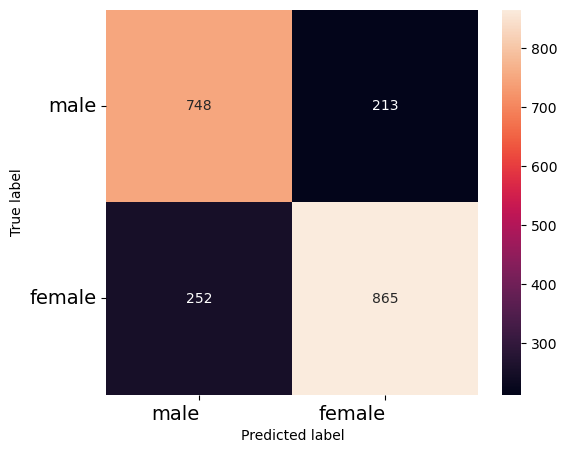

[[748 213]
 [252 865]]


In [354]:
CM = confusion_matrix(df2.true,df2.opencv_pred)
print_cm(CM,['male','female'], (6,5))
print(CM)

In [335]:
CR = classification_report(df2.true,df2.opencv_pred,target_names=['male','female'])
print(CR)

              precision    recall  f1-score   support

        male       0.75      0.78      0.76       961
      female       0.80      0.77      0.79      1117

    accuracy                           0.78      2078
   macro avg       0.78      0.78      0.78      2078
weighted avg       0.78      0.78      0.78      2078



In [362]:
print(pd.DataFrame(classification_report(df2.true,df2.genderize_pred,target_names=['male','female'], output_dict=True)).transpose().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &      support \\
\midrule
male         &   0.908124 &  0.977107 &  0.941353 &   961.000000 \\
female       &   0.978927 &  0.914951 &  0.945858 &  1117.000000 \\
accuracy     &   0.943696 &  0.943696 &  0.943696 &     0.943696 \\
macro avg    &   0.943525 &  0.946029 &  0.943606 &  2078.000000 \\
weighted avg &   0.946183 &  0.943696 &  0.943775 &  2078.000000 \\
\bottomrule
\end{tabular}



C:\Users\vicda\AppData\Local\Temp\ipykernel_33908\3517401367.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(classification_report(df2.true,df2.genderize_pred,target_names=['male','female'], output_dict=True)).transpose().to_latex())


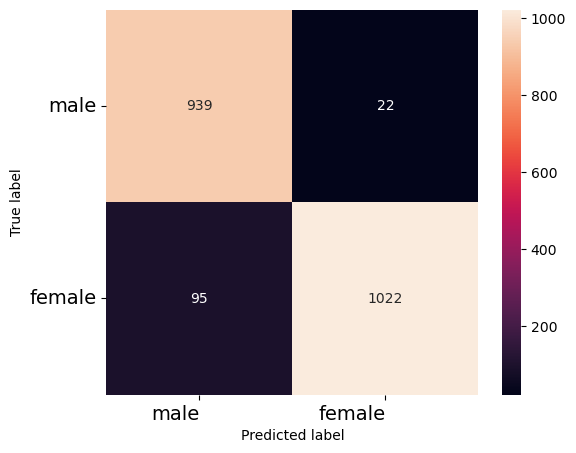

[[ 939   22]
 [  95 1022]]


In [391]:
CM = confusion_matrix(df2.true,df2.genderize_pred)
print_cm(CM,['male','female'], (6,5))
print(CM)

In [309]:
CR = classification_report(df2.true,df2.genderize_pred,target_names=['male','female'])
print(CR)

              precision    recall  f1-score   support

        male       0.91      0.98      0.94       961
      female       0.98      0.91      0.95      1117

    accuracy                           0.94      2078
   macro avg       0.94      0.95      0.94      2078
weighted avg       0.95      0.94      0.94      2078



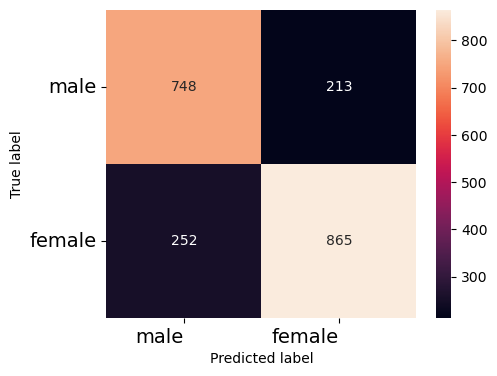

[[748 213]
 [252 865]]


In [399]:
CM = confusion_matrix(df2.true,df2.opencv_pred)
print_cm(CM,['male','female'], (5,4))
print(CM)

In [363]:
CR = classification_report(df2.true,pred_tresh,target_names=['male','female'])
print(CR)

              precision    recall  f1-score   support

        male       0.89      0.93      0.91       961
      female       0.94      0.90      0.92      1117

    accuracy                           0.92      2078
   macro avg       0.92      0.92      0.92      2078
weighted avg       0.92      0.92      0.92      2078



In [385]:
CR = classification_report(df2.true,preds__,target_names=['male','female'], output_dict=True)
print(CR)

{'male': {'precision': 0.9179841897233202, 'recall': 0.9667013527575442, 'f1-score': 0.9417131272174354, 'support': 961}, 'female': {'precision': 0.9699812382739212, 'recall': 0.9256938227394808, 'f1-score': 0.9473202015574896, 'support': 1117}, 'accuracy': 0.9446583253128008, 'macro avg': {'precision': 0.9439827139986208, 'recall': 0.9461975877485125, 'f1-score': 0.9445166643874625, 'support': 2078}, 'weighted avg': {'precision': 0.9459344800173632, 'recall': 0.9446583253128008, 'f1-score': 0.944727132047965, 'support': 2078}}


In [377]:
dd = pd.DataFrame(classification_report(df2.true,pred_tresh,target_names=['male','female'], output_dict=True)).transpose()[["precision","recall"]].iloc[:2].reset_index()
dd2 = dd.copy()
dd = dd.append(dd2)
dd["set"] = dd["index"].str.len()
print(dd.set_index(["index","set"]).to_latex())

\begin{tabular}{llrr}
\toprule
       &   &  precision &    recall \\
index & set &            &           \\
\midrule
male & 4 &   0.893107 &  0.930281 \\
female & 6 &   0.937790 &  0.904208 \\
male & 4 &   0.893107 &  0.930281 \\
female & 6 &   0.937790 &  0.904208 \\
\bottomrule
\end{tabular}



C:\Users\vicda\AppData\Local\Temp\ipykernel_33908\3176454215.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dd = dd.append(dd2)
C:\Users\vicda\AppData\Local\Temp\ipykernel_33908\3176454215.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.set_index(["index","set"]).to_latex())


In [389]:
df2.true.value_counts()/(df2.shape[0]), df2.shape[0]

(1    0.537536
 0    0.462464
 Name: true, dtype: float64,
 2078)

In [374]:
dd["index"].str.len()

0    4
1    6
Name: index, dtype: int64

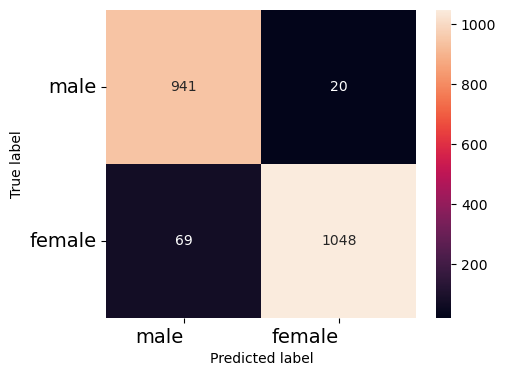

[[ 941   20]
 [  69 1048]]


In [353]:
CM = confusion_matrix(df2.true,pred_wa)
print_cm(CM,['male','female'], (5,4))
print(CM)

In [311]:
CR = classification_report(df2.true,pred_wa,target_names=['male','female'])
print(CR)

              precision    recall  f1-score   support

        male       0.93      0.98      0.95       961
      female       0.98      0.94      0.96      1117

    accuracy                           0.96      2078
   macro avg       0.96      0.96      0.96      2078
weighted avg       0.96      0.96      0.96      2078



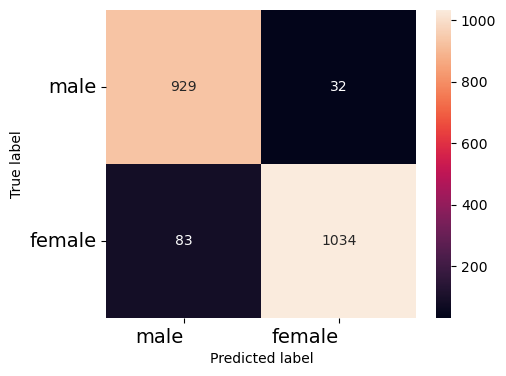

[[ 929   32]
 [  83 1034]]


In [352]:
CM = confusion_matrix(df2.true,preds__)
print_cm(CM,['male','female'], (5,4))
print(CM)

In [342]:
CR = classification_report(df2.true,preds__,target_names=['male','female'])
print(CR)

              precision    recall  f1-score   support

        male       0.92      0.97      0.94       961
      female       0.97      0.93      0.95      1117

    accuracy                           0.94      2078
   macro avg       0.94      0.95      0.94      2078
weighted avg       0.95      0.94      0.94      2078



In [285]:
ddf = pd.read_csv("0_9999.csv")
ddf.head()

,listing_id,guest_id,review_date,name,profile,address,language,job,reviews,image
0,2708,93292025,2018-07-01,Harjinder,"['Identity', 'Email address', 'Phone number']",Portugal,NaN,NaN,['Harj was an easy guy to host for a month in ...,https://a0.muscache.com/im/pictures/user/5f09d...
1,2708,183639942,2018-07-15,Taylor,"['Identity', 'Email address', 'Phone number']","Summit, NJ",NaN,NaN,[],https://a0.muscache.com/im/pictures/user/98383...
2,2708,37846734,2018-07-26,John,"['Identity', 'Email address', 'Phone number']","Los Angeles, CA",NaN,Software Engineer,"[""John was a delightful guest. He communicated...",https://a0.muscache.com/im/pictures/user/054a0...
3,2708,48408491,2018-08-12,Andrew,"['Identity', 'Email address', 'Phone number']","London, United Kingdom",NaN,NaN,['Great Guests. Was no trouble at all. Kept th...,https://a0.muscache.com/im/pictures/user/3f125...
4,2708,51146446,2018-09-07,Stephanie,"['Identity', 'Email address', 'Phone number']","Garden City, NY",NaN,NaN,['Stephanie was a great guest. She’s very quie...,https://a0.muscache.com/im/pictures/user/c7457...


In [291]:
ddf.shape

(10000, 10)

In [290]:
ddf.describe()

,listing_id,guest_id
count,10000.000000,1.000000e+04
mean,283473.542200,8.868816e+07
std,193313.635076,7.855036e+07
min,2708.000000,9.512000e+03
25%,72702.000000,2.060660e+07
50%,288428.000000,6.363130e+07
75%,463025.000000,1.504396e+08
max,592996.000000,2.992228e+08


In [288]:
ddf.listing_id.value_counts()

533646    225
15440     179
5728      160
528860    159
334366    153
         ... 
469951      2
14945       2
495207      2
339619      2
416651      2
Name: listing_id, Length: 261, dtype: int64

# Classification

In [196]:
encodings[0].shape

(128,)

In [200]:
filenames = l_e1["names"]
bboxes = l_e1["bbox"]
encodings = l_e1["encodings"]
df['encodings'] = [0]*len(df.image)
for filename, bbox, encoding in zip(filenames, bboxes, encodings):
    id = int(filename[:-4].split('_')[1])
    try:
        if df[df.guest_id==id].true.values[0]>-1:
            print(df.encodings.iloc[df[df.guest_id==id].index])
            print(encoding)
            df.encodings.iloc[df[df.guest_id==id].index] = encoding
            print(df.encodings.iloc[df[df.guest_id==id].index])
    except:
        continue

59    0
Name: encodings, dtype: int64
[-0.12239659  0.0647551   0.07510221  0.00837883 -0.07394888  0.10068157
  0.002372   -0.14644651  0.10823604 -0.02383139  0.14562079 -0.01648319
 -0.31603128 -0.05205613  0.03039527  0.10609477 -0.09872044 -0.15283439
 -0.21617612 -0.04692331  0.01931543 -0.00082064  0.01815752 -0.02613395
 -0.17135853 -0.33999896 -0.10077152 -0.16837731  0.03453121 -0.0529986
  0.01084568 -0.03017002 -0.1693143  -0.07226582  0.00286072  0.00857821
 -0.10140014 -0.14453442  0.2118986  -0.07514092 -0.15800089  0.00423219
  0.12418826  0.17972879  0.1109812   0.02594524  0.08152163 -0.00866062
  0.07764225 -0.29912031  0.07712713  0.07629836  0.19766243  0.16311124
  0.19845828 -0.21496998  0.0965751   0.10669795 -0.1998423   0.14616111
  0.05146525 -0.03029045 -0.04019355 -0.03271708  0.24824035  0.12942286
 -0.11411608 -0.1230365   0.11574121 -0.09229991  0.00934006  0.13564883
 -0.11413009 -0.1739485  -0.24729623  0.04366104  0.42403191  0.13626817
 -0.27535307 -

C:\Users\vicda\AppData\Local\Temp\ipykernel_24572\348099609.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.encodings.iloc[df[df.guest_id==id].index] = encoding


60    0
Name: encodings, dtype: int64
[-0.1355799   0.07106201  0.03524248 -0.06044819 -0.16916491  0.01842104
  0.04057194 -0.04444326  0.17052577 -0.11556035  0.19228184 -0.02547719
 -0.32288709  0.09152162 -0.02853665  0.15893184 -0.19727205 -0.15397069
 -0.14745143 -0.01864316 -0.00753959  0.11269926 -0.02088928  0.02336439
 -0.09625787 -0.37285507 -0.06130332 -0.12986811  0.08458342 -0.01578786
 -0.02736935  0.02962659 -0.12482462  0.01735796  0.10779699 -0.0098156
 -0.09362897 -0.09753745  0.23323764  0.01140603 -0.28992388 -0.04078398
  0.06865319  0.18463787  0.21317539  0.01514413 -0.0105497  -0.14552899
  0.16769734 -0.2972016   0.0474676   0.18310307  0.07355894  0.08134073
  0.083426   -0.19618382 -0.01747514  0.16477573 -0.23799086  0.00759234
  0.03005398 -0.06140952 -0.02968271 -0.03588117  0.15461501  0.04421183
 -0.15474442 -0.13173662  0.24901906 -0.17885652  0.02729598  0.11453611
 -0.09910664 -0.23826449 -0.13437462  0.03761793  0.40012938  0.10353974
 -0.08340569  

In [201]:
df.encodings.value_counts()

0    413
Name: encodings, dtype: int64

# Race

Ethnicolr - It is not possiblr to use because the last names are not available (only for 2% of samples).

Create a database from census data of different countries?
Try other models